<a href="https://colab.research.google.com/github/olaleyeayoola/Image-Classifier/blob/master/shapes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
# Import PyTorch Libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [0]:
# Import Other Libraries
import matplotlib.pyplot as plt
import os  

# Define Paths and Model

In [0]:
#Unzip File
from zipfile import ZipFile
# Create a ZipFile Object and load sample.zip in it
with ZipFile('shapes.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()


In [0]:
path = 'shapes'

In [5]:
model = torchvision.models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
def load_dataset(data_path):
    
    # Resize to 256 x 256, center-crop to 224x224 (to match the resnet image size), and convert to Tensor
    transformation = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    # Load all of the images, transforming them
    full_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=transformation
    )
    
    # Split into training (70%) and testing (30%) datasets)
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])
    
    # define a loader for the training data we can iterate through in 32-image batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=4,
        num_workers=0,
        shuffle=False
    )
    
    # define a loader for the testing data we can iterate through in 32-image batches
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=4,
        num_workers=0,
        shuffle=False
    )
        
    return train_loader, test_loader


In [0]:
# Define our class names
classes = ['circle', 'square', 'triangle']

In [0]:
# Get the iterative dataloaders for test and training data
train_loader, test_loader = load_dataset(path)

In [0]:
def train(model, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        data, target = data.to('cuda'), target.to('cuda')
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [0]:
def test(model, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to("cuda"), target.to("cuda")
            # Get the predicted classes for this batch
            output = model(data)
            # calculate the loss and successful predictions for this batch
            test_loss += loss_criteria(output, target).item()
            pred = output.max(1, keepdim=True)[1] 
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average loss and total accuracy for this epoch
    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return test_loss

In [0]:
# Create an instance of the model class and allocate it to the device
model = model.to("cuda")

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

In [15]:
# Train over 3 epochs
epochs = 3
for epoch in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer, epoch)
    test_loss = test(model, test_loader)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
	Training batch 1 Loss: 8.485950
	Training batch 2 Loss: 5.219261
	Training batch 3 Loss: 0.934158
	Training batch 4 Loss: 1.464446
	Training batch 5 Loss: 0.016683
	Training batch 6 Loss: 3.923137
	Training batch 7 Loss: 1.940982
	Training batch 8 Loss: 6.539708
	Training batch 9 Loss: 1.317582
	Training batch 10 Loss: 0.522532
	Training batch 11 Loss: 0.200449
	Training batch 12 Loss: 0.767241
	Training batch 13 Loss: 0.117104
	Training batch 14 Loss: 0.092376
	Training batch 15 Loss: 0.505931
	Training batch 16 Loss: 0.691702
	Training batch 17 Loss: 0.127622
	Training batch 18 Loss: 0.293167
	Training batch 19 Loss: 0.139506
	Training batch 20 Loss: 0.131469
	Training batch 21 Loss: 0.259092
	Training batch 22 Loss: 0.609505
	Training batch 23 Loss: 0.005195
	Training batch 24 Loss: 0.018751
	Training batch 25 Loss: 0.166603
	Training batch 26 Loss: 0.001794
	Training batch 27 Loss: 0.757545
	Training batch 28 Loss: 0.827014
	Training batch 29 Loss: 0.333795
	Training batc

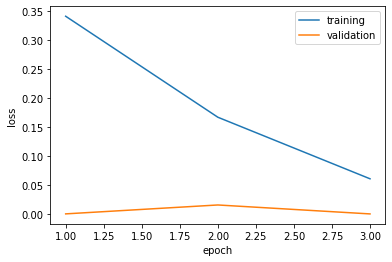

In [16]:
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [0]:
#Saving the model
model = model.to('cpu')
torch.save(model, 'test.pth')